In [4]:
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


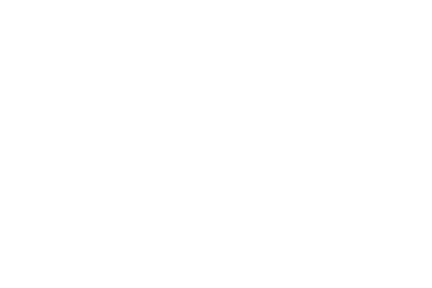

[[<Figure size 432x288 with 4 Axes>]]

In [5]:
class Strat(bt.Strategy):
    def next(self):
        if not self.getposition(self.data).size:
            self.order_target_percent(self.data, target=1.0)


start = datetime(1999,1,1)
end = datetime(2019,1,1)

cerebro = bt.Cerebro()

data = bt.feeds.YahooFinanceData(dataname='SPY',
                                 fromdate=start,
                                 todate=end)
cerebro.adddata(data)
cerebro.addstrategy(Strat)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio') 

results = cerebro.run()
cerebro.plot()

In [6]:
import pyfolio as pf

Start date,1999-01-04
End date,2018-12-31
Total months,239
,Backtest
Annual return,5.5%
Cumulative returns,191.9%
Annual volatility,19.1%
Sharpe ratio,0.38
Calmar ratio,0.10
Stability,0.71
Max drawdown,-54.9%


<IPython.core.display.Javascript object>


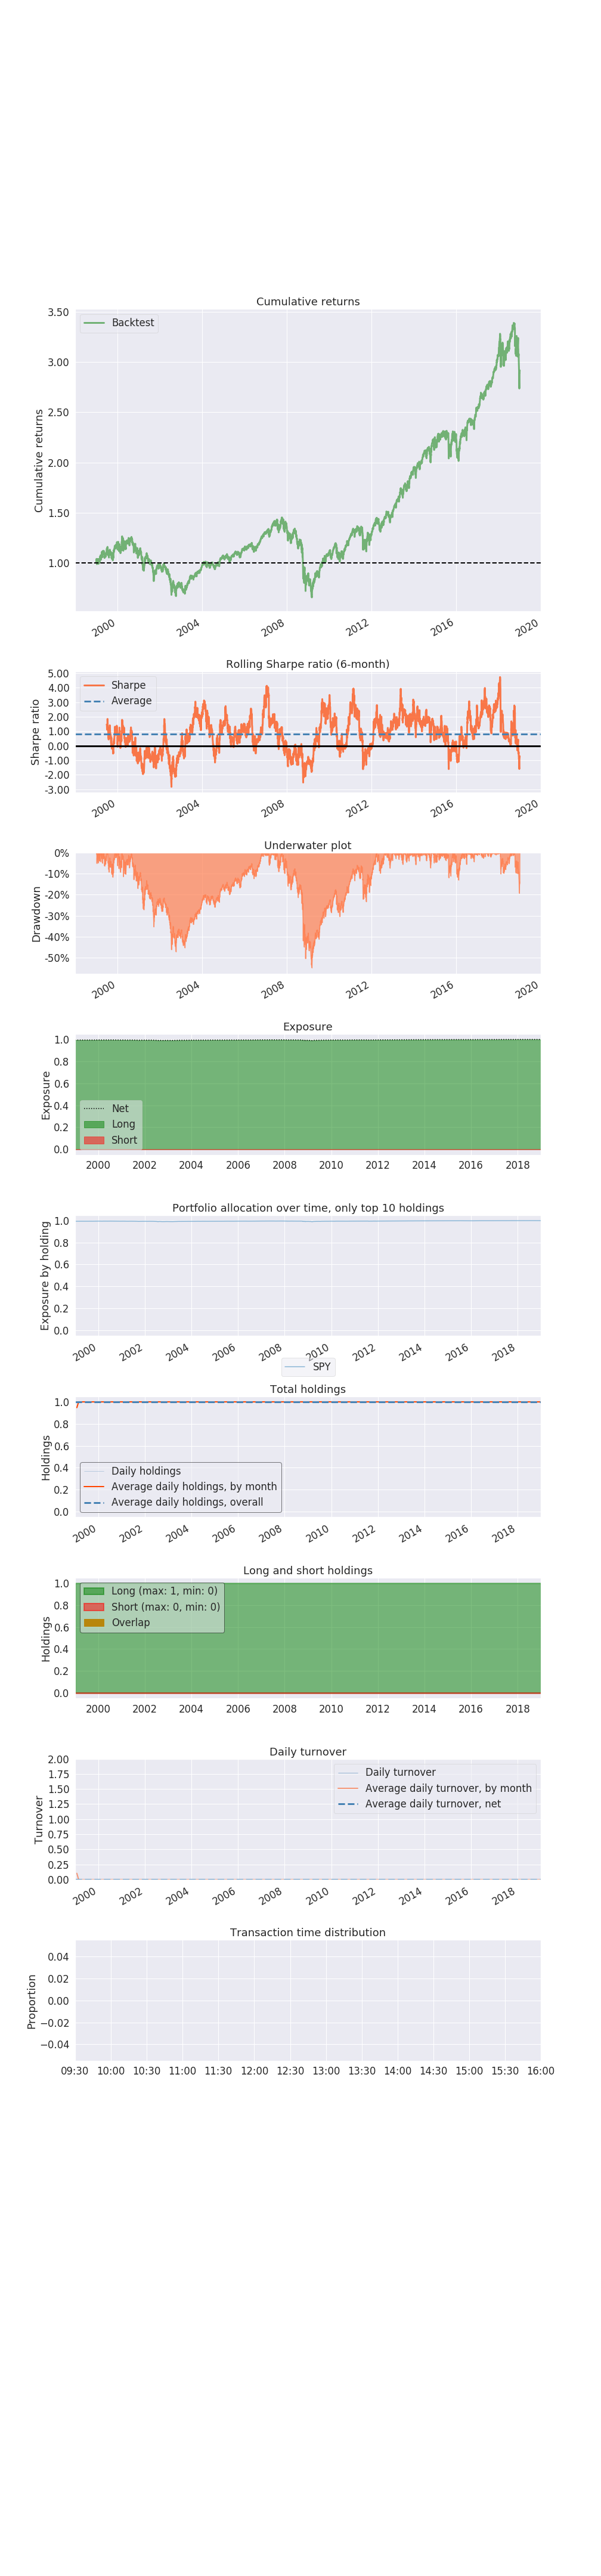

In [8]:

strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
pf.create_simple_tear_sheet(
            returns,
            positions=positions,
            transactions=transactions)